In [5]:
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt

from functools import wraps

In [10]:
def simulation(functor):
    @wraps(functor)
    def wrapper(n, mu_X, mu_Y, sigma_X, sigma_Y, num_simulations=1000, alpha=0.05):
        rejections = 0
        for _ in range(num_simulations):
            x = np.random.normal(mu_X, sigma_X, n)
            y = np.random.normal(mu_Y, sigma_Y, n)
            if functor(x, y) < alpha:
                rejections += 1
        return rejections / num_simulations
    return wrapper

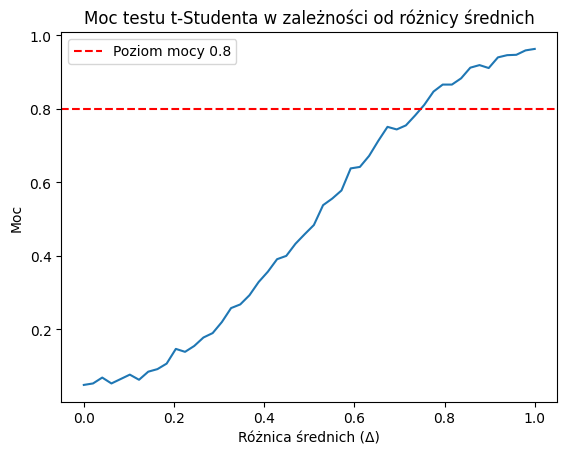

0.7551020408163265

In [11]:
@simulation
def simulate_t_test(x, y):
    _, p_value = stats.ttest_ind(x, y)
    return p_value

n = 30
mu_X = 0
mu_Ys = np.linspace(0, 1, 50)
sigma_X = sigma_Y = 1
num_simulations = 1000
alpha = 0.05

powers = [simulate_t_test(n, mu_X, mu_Y, sigma_X, sigma_Y, num_simulations, alpha) for mu_Y in mu_Ys]

plt.plot(mu_Ys, powers)
plt.xlabel('Różnica średnich (Δ)')
plt.ylabel('Moc')
plt.title('Moc testu t-Studenta w zależności od różnicy średnich')
plt.axhline(y=0.8, color='r', linestyle='--', label='Poziom mocy 0.8')
plt.legend()
plt.show()

min_detectable_difference = mu_Ys[np.where(np.array(powers) >= 0.8)[0][0]]
min_detectable_difference


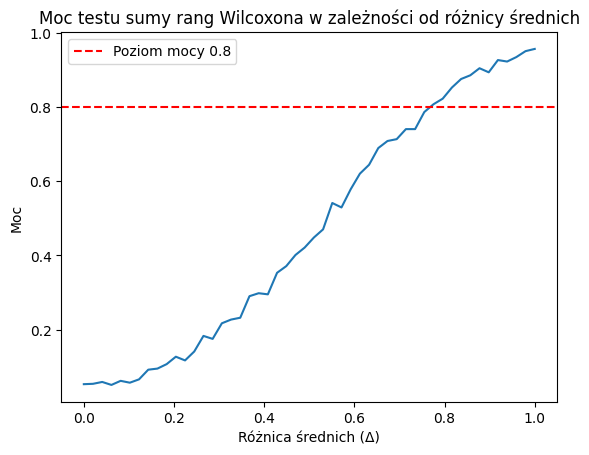

0.7755102040816326

In [13]:
@simulation
def simulate_wilcoxon_test(x, y):
    _, p_value = stats.mannwhitneyu(x, y)
    return p_value


powers_wilcoxon = [simulate_wilcoxon_test(n, mu_X, mu_Y, sigma_X, sigma_Y, num_simulations, alpha) for mu_Y in mu_Ys]

plt.plot(mu_Ys, powers_wilcoxon)
plt.xlabel('Różnica średnich (Δ)')
plt.ylabel('Moc')
plt.title('Moc testu sumy rang Wilcoxona w zależności od różnicy średnich')
plt.axhline(y=0.8, color='r', linestyle='--', label='Poziom mocy 0.8')
plt.legend()
plt.show()

min_detectable_difference_wilcoxon = mu_Ys[np.where(np.array(powers_wilcoxon) >= 0.8)[0][0]]
min_detectable_difference_wilcoxon
